In [1]:
import csv
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
from skimage.transform import resize
from skimage.color import rgb2gray
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn import svm

In [2]:
ops.reset_default_graph()

#csvtrain = 'D:\F.C.I_H\PR\DataSet\Training'
csvtrain = 'E:\\F.C.I_H\\SELECTED\\DATASETS\\Training'

targettrain = []
imagestrain = []
for dir, sub, files in os.walk(csvtrain,topdown=True):
    
    for file in files:
        if file.endswith(".csv"):
            file_path = os.path.join(dir,file)
            csv_file = open(file_path,'r')
            csv_data = csv.reader(csv_file,delimiter=';')
            next(csv_data)
            for line in csv_data:
                img_path = os.path.join(dir,line[0])
                #img_array = cv2.imread(img_path)
                imagestrain.append(cv2.imread(img_path))
                #plt.imshow(img_array)
                plt.show()
                #print(line[7])
                #print(img_array)
                targettrain.append(line[7])
            csv_file.close()
xtrain = np.array(imagestrain)
ytrain = np.array(targettrain)
#--------------------Test-------------------------
csvtest = 'E:\\F.C.I_H\\SELECTED\\DATASETS\\Testing'
targettest = []
imagestest = []
for dir, sub, files in os.walk(csvtest,topdown=True):
    
    for file in files:
        if file.endswith(".csv"):
            file_path = os.path.join(dir,file)
            csv_file = open(file_path,'r')
            csv_data = csv.reader(csv_file,delimiter=';')
            next(csv_data)
            for line in csv_data:
                img_path = os.path.join(dir,line[0])
                #img_array = cv2.imread(img_path)
                imagestest.append(cv2.imread(img_path))
                #plt.imshow(img_array)
                #plt.show()
                #print(line[7])
                #print(img_array)
                targettest.append(line[7])
            csv_file.close()
xtest = np.asarray(imagestest)
ytest = np.asarray(targettest)
y_test = ytest

C:\Users\abano\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [3]:
#resizing testimages and change it from RGB to GrayScale
resizedimages = []
for image in xtest:
    re = resize(image, (28, 28))
    gray = rgb2gray(re)
    resizedimages.append(gray)
xtest = np.asarray(resizedimages)

In [4]:
#resizing trainimages and change it from RGB to GrayScale
resizedimages = []
for image in xtrain:
    re = resize(image, (28, 28))
    gray = rgb2gray(re)
    resizedimages.append(gray)
xtrain = np.asarray(resizedimages)

In [5]:
xtrain = xtrain.reshape(4591, xtrain.shape[1]*xtrain.shape[2])
xtest = xtest.reshape(2534,xtest.shape[1]*xtest.shape[2])

In [6]:
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True)
)
y_score = classifier.fit(xtrain, ytrain).decision_function(xtest)

clf = classifier


In [7]:
y_score.shape

(2534, 62)

In [8]:

y_pred = clf.predict(xtest)


In [9]:
y_test

array(['0', '0', '0', ..., '61', '61', '61'], dtype='<U2')

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, plot_roc_curve
cm = confusion_matrix(y_test, y_pred , labels = None) 
accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

0.8721389108129439

In [11]:
cm

array([[  5,   1,   0, ...,   0,   0,   0],
       [  0,  27,   0, ...,   0,   0,   0],
       [  0,   1,  14, ...,   1,   0,   0],
       ...,
       [  0,   0,   0, ..., 104,   0,   0],
       [  0,   0,   0, ...,   0,  81,   0],
       [  0,   0,   0, ...,   0,   0,  10]], dtype=int64)

In [12]:
cm.shape

(58, 58)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

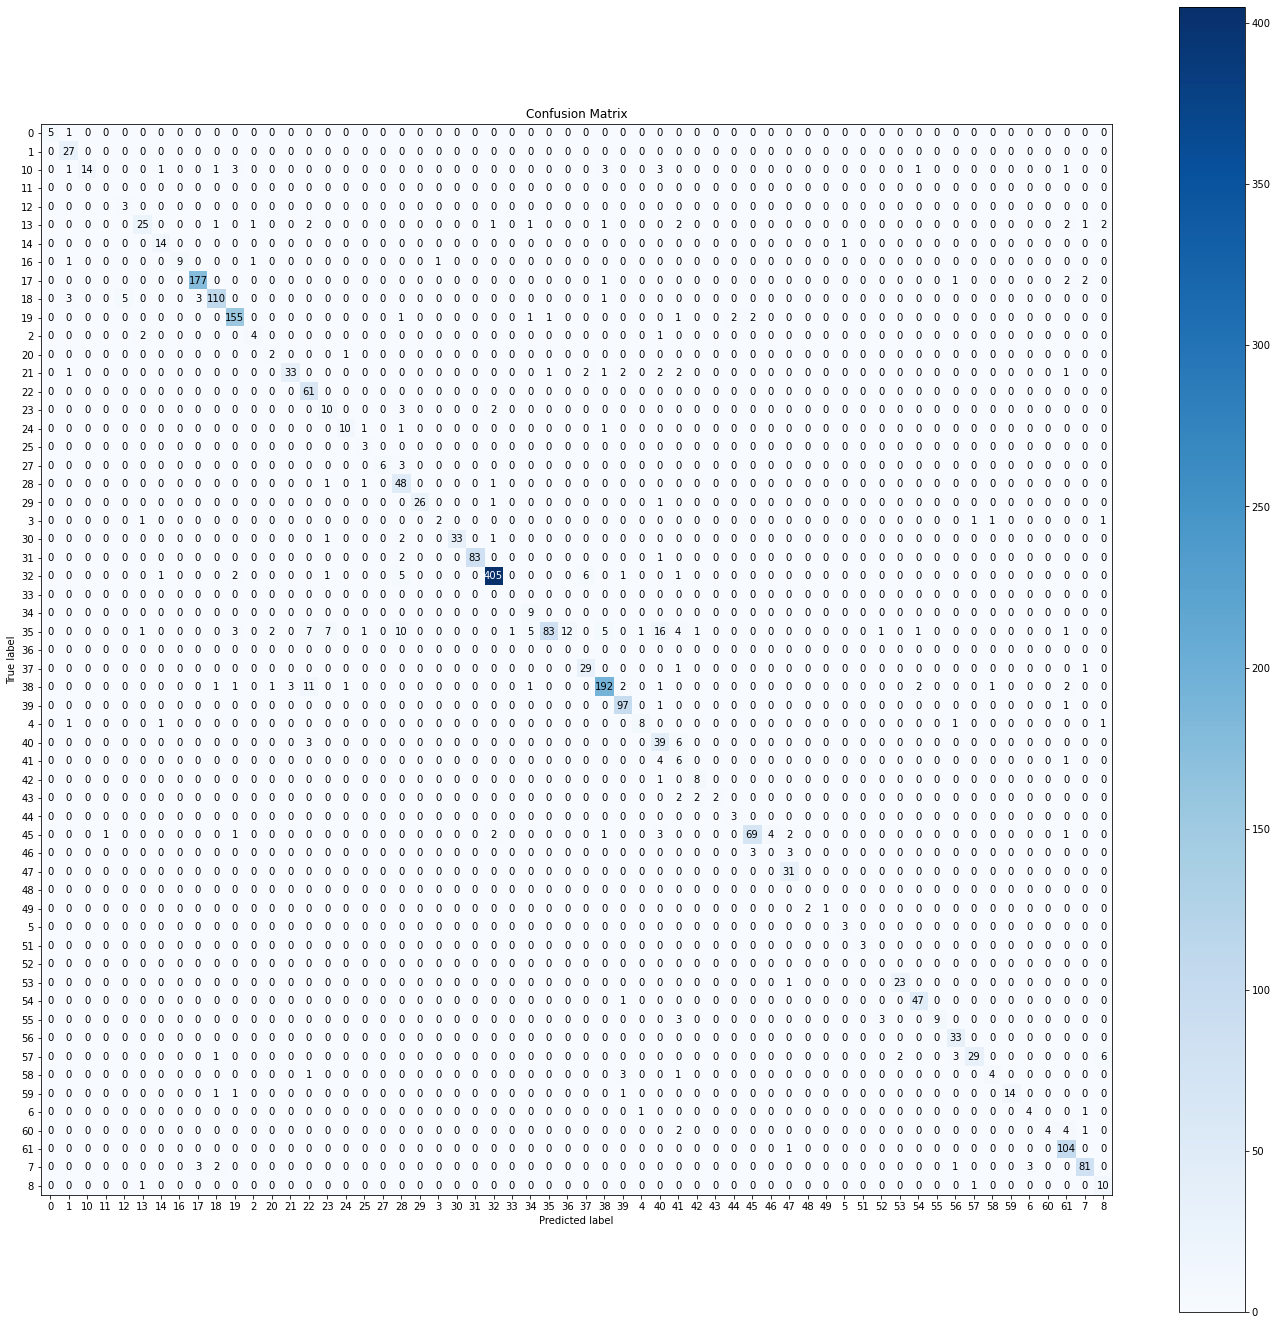

In [13]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(24,24))

In [14]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from itertools import cycle


In [15]:
array = []
for i in range(62):
    array.append(i)
array = np.array(array)

ytrain = label_binarize(ytrain, classes=array)
ytest = label_binarize(ytest, classes=array)


In [16]:
y_score.shape

(2534, 62)

In [17]:
ytrain

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [18]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(62):
    fpr[i], tpr[i], _ = roc_curve(ytest[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ytest.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

C:\Users\abano\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
C:\Users\abano\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
C:\Users\abano\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
C:\Users\abano\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
C:\Users\abano\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No posit

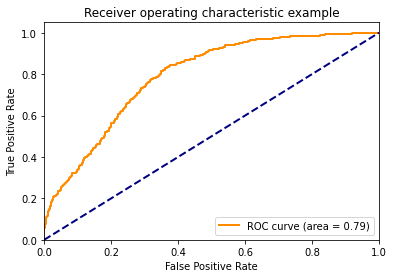

In [19]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [32]:
import random
n_classes = 62
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
%matplotlib qt
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

#colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=(random.random(),random.random(),random.random()),
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.figure(figsize=(25, 25))
plt.show()